### Abstract

#### UCD_PA Specialist Certificate in Data Analytics Essentials

Data Source: https://www.kaggle.com/datasets/ashishraut64/internet-users and https://www.kaggle.com/datasets/elmoallistair/world-internet-user

### Import Libraries

In [221]:
# Import libraries

import pandas as pd
import numpy as np
import math

# Regex
import re

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# For API
import requests

# sklearn 
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor



### Custom Functions

In [222]:
# Remove column one from a csv file

def remove_column_one(filename):
    """
    Removes the first column from a CSV file and saves the modified content to a new file.

    Args:
        filename (str): The name or path of the input CSV file.

    Raises:
        FileNotFoundError: If the input file is not found.

    Returns:
        None
    """
    
    with open(filename, 'r') as input_file, open('output.csv', 'w') as output_file:
        # Read the file line by line
        for line in input_file:
            # Split the line into columns
            columns = line.split(',')
            # Remove the first column
            new_columns = columns[1:]
            # Join the columns back together and write the line to the output file
            output_file.write(','.join(new_columns))

In [223]:
# Count the number of entries for each value in the first column

def count_first_column(filename):
    """
    Counts the number of entries for each unique value in the first column of a CSV file.

    Args:
        filename (str): The name or path of the input CSV file.

    Raises:
        FileNotFoundError: If the input file is not found.

    Returns:
        None
    """
    
    with open(filename) as file:
        # Skip the column names
        file.readline()

        # Initialize an empty dictionary: counts_dict
        counts_dict = {}

        # Process each row in the dataset
        for line in file:
            # Split the current line into a list: columns
            columns = line.split(',')

            # Get the value for the first column: first_col
            first_col = columns[0]

            # If the column value is in the dict, increment its value
            if first_col in counts_dict.keys():
                counts_dict[first_col] += 1
            # Else, add to the dict and set value to 1
            else:
                counts_dict[first_col] = 1

    # Print the resulting dictionary
    print(counts_dict)

In [224]:
# General statistics between chosen years

def calculate_statistics(data, column, start_year, end_year):
    """
    Calculates some general statistics (mean, median, and standard deviation) for a specified column in a DataFrame
    based on the data within a chosen range of years (based on the assumption there is a 'Year' column).

    Args:
        data (DataFrame): The input DataFrame containing the data.
        column (str): The name of the column in the DataFrame for which to calculate statistics.
        start_year (int): The starting year of the range.
        end_year (int): The ending year of the range.

    Returns:
        dict: A dictionary containing the calculated statistics.
            - 'mean' (float): The mean value of the specified column within the chosen range of years.
            - 'median' (float): The median value of the specified column within the chosen range of years.
            - 'std_dev' (float): The standard deviation of the specified column within the chosen range of years.
    """
    
    # Filter the data for the specified years
    filtered_data = data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]

    # Select the specific column for calculations
    column_data = filtered_data[column]

    # Calculate the statistics using numpy functions
    mean = np.mean(column_data)
    median = np.median(column_data)
    std_dev = np.std(column_data)

    # Return the calculated statistics
    return {
        'mean': mean,
        'median': median,
        'std_dev': std_dev,
    }

### Import a csv file into Pandas DataFrame

In [225]:
#Import the first dataset. It considers internet usage by country, by year
global_users = pd.read_csv('Global Internet Users.csv')

#### Dataset Description

- Countries are listed, and there is information for every year from 1980 to 2020 for each country.
- There are two columns about internet usage, 'Internet Users(%)' and 'No. of Internet Users'.
- There is information in the table about the no. of broadband subscriptions per 100 people.
- There is information about mobile phone subscriptions per 100 people 'Cellular Subscriptions'.

##### What was written about the data on Kaggle website.

Context. 
The Internet (or internet) is a global system of interconnected computer networks that uses the Internet protocol suite (TCP/IP) to communicate between networks and devices. It is a network of networks that consists of private, public, academic, business, and government networks of local to global scope, linked by a broad array of electronic, wireless, and optical networking technologies. The Internet carries a vast range of information resources and services, such as the interlinked hypertext documents and applications of the World Wide Web (WWW), electronic mail, telephony, and file sharing.

Content. 
The following dataset has information about internet users from 1980-2020. Details about the columns are as follows:

Entity - Contains the name of the countries and the regions. 

Code - Information about country code and where code has the value 'Region', it denotes division by grouping various countries.

Year - Year from 1980-2020 

Cellular Subscription - Mobile phone subscriptions per 100 people. This number can get over 100 when the average person has more than one subscription to a mobile service. 

Internet Users(%) - The share of the population that is accessing the internet for all countries of the world.

No. of Internet Users - Number of people using the Internet in every country. 

Broadband Subscription - The number of fixed broadband subscriptions per 100 people. This refers to fixed subscriptions to high-speed access to the public Internet (a TCP/IP connection), at downstream speeds equal to, or greater than, 256 kbit/s.

In [226]:
global_users.head()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


In [227]:
global_users.tail()

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
8862,8862,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633
8863,8863,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694
8864,8864,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322
8865,8865,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818
8866,8866,Zimbabwe,ZWE,2020,88.755806,29.299999,4591211,1.368916


In [228]:
#Remove the first column of the dataframe as it is only counting the row number

global_users = global_users.iloc[:,1:]

### Regex

In [229]:
# Look at the types of each column
global_users.dtypes

Entity                     object
Code                       object
Year                        int64
Cellular Subscription     float64
Internet Users(%)         float64
No. of Internet Users       int64
Broadband Subscription    float64
dtype: object

In [230]:
# The 'Year' column is type int64. Therefore, to use a regex, it need to be converted to a string type

global_users['Year'] = global_users['Year'].astype(str)

# Check the types of columns now

global_users.dtypes

Entity                     object
Code                       object
Year                       object
Cellular Subscription     float64
Internet Users(%)         float64
No. of Internet Users       int64
Broadband Subscription    float64
dtype: object

In [231]:
reg = r"199\d{1}"

matching_pattern = global_users['Year'].str.contains(reg)

matching_df = global_users[matching_pattern]
print(matching_df.head())
print(matching_df.tail())

         Entity Code  Year  Cellular Subscription  Internet Users(%)  \
10  Afghanistan  AFG  1990                    0.0                0.0   
11  Afghanistan  AFG  1991                    0.0                0.0   
12  Afghanistan  AFG  1992                    0.0                0.0   
13  Afghanistan  AFG  1993                    0.0                0.0   
14  Afghanistan  AFG  1994                    0.0                0.0   

    No. of Internet Users  Broadband Subscription  
10                      0                     0.0  
11                      0                     0.0  
12                      0                     0.0  
13                      0                     0.0  
14                      0                     0.0  
        Entity Code  Year  Cellular Subscription  Internet Users(%)  \
8841  Zimbabwe  ZWE  1995               0.000000           0.007684   
8842  Zimbabwe  ZWE  1996               0.000000           0.016790   
8843  Zimbabwe  ZWE  1997               0.

### Replace missing values

We would prefer to replace missing values in this dataset than drop duplicates since duplicates ares there for a reason, for instance, in the 'Year' column they are there because each country has every year from 1980 to 2020 or in the 'Entity' column each country is repeated becuase it has 21 entries. 

In [232]:
# Count how many missing values there are in the 'Year' column
global_users['Year'].isna().sum() 

0

In [233]:
# Replace missing values
median_year = global_users['Year'].median()

print(median_year)

2000.0


In [234]:
# This median should be no supirse as the dataset has years 1980 to 2020 for each country

In [235]:
global_users['Year'].fillna(median_year, inplace=True) # inplace=True returns the modified dataset as global_users, not as a copy of the dataframe

In [236]:
# Again, count how many missing values there are
global_users['Year'].isna().sum() 

0

In [237]:
# Clearly, there were no missing values beforehand or afterwards

### Iterators

We will write a custom Python function to remove the first column of the global Internet Users csv file

In [238]:
remove_column_one('Global Internet Users.csv') # output.csv is the output

In [239]:
#Check that column one has indeed been removed
global_users2 = pd.read_csv('output.csv')

In [240]:
global_users2.head()

,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


In [241]:
count_first_column('output.csv')

{'Afghanistan': 41, 'Albania': 41, 'Algeria': 41, 'American Samoa': 22, 'Andorra': 41, 'Angola': 41, 'Antigua and Barbuda': 34, 'Argentina': 41, 'Armenia': 41, 'Aruba': 35, 'Australia': 41, 'Austria': 41, 'Azerbaijan': 41, 'Bahamas': 40, 'Bahrain': 41, 'Bangladesh': 41, 'Barbados': 41, 'Belarus': 41, 'Belgium': 41, 'Belize': 41, 'Benin': 41, 'Bermuda': 37, 'Bhutan': 41, 'Bolivia': 41, 'Bosnia and Herzegovina': 41, 'Botswana': 41, 'Brazil': 41, 'British Virgin Islands': 23, 'Brunei': 40, 'Bulgaria': 41, 'Burkina Faso': 41, 'Burundi': 41, 'Cambodia': 41, 'Cameroon': 41, 'Canada': 41, 'Cape Verde': 41, 'Cayman Islands': 36, 'Central African Republic': 41, 'Chad': 41, 'Chile': 41, 'China': 41, 'Colombia': 41, 'Comoros': 41, 'Congo': 40, 'Costa Rica': 41, "Cote d'Ivoire": 41, 'Croatia': 41, 'Cuba': 41, 'Curacao': 12, 'Cyprus': 41, 'Czechia': 41, 'Democratic Republic of Congo': 38, 'Denmark': 41, 'Djibouti': 41, 'Dominica': 41, 'Dominican Republic': 38, 'East Asia and Pacific': 41, 'Ecuador'

Comments:
- This is pretty much just giving us a count of how many times each country is mentioned in the first 1000 lines of the code

### Merge Datasets

In [242]:
# Import a second dataset
world_users = pd.read_csv('world_internet_user.csv')

In [243]:
world_users.head()

,Country,Region,Population,Internet Users,% of Population
0,_World,NaN,7920539977,5424080321,68.48
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28
3,Algeria,Africa,45150879,37836425,83.80
4,American Samoa,Oceania,54995,34800,63.28


In [244]:
# Rename the column names
global_users = global_users.rename(columns={'Entity': 'Country', 'No. of Internet Users': 'No. of Internet Users'})
world_users = world_users.rename(columns={'Country': 'Country', 'Internet Users': 'No. of Internet Users'})

In [245]:
global_users.head()

,Country,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,Afghanistan,AFG,1980,0.0,0.0,0,0.0
1,Afghanistan,AFG,1981,0.0,0.0,0,0.0
2,Afghanistan,AFG,1982,0.0,0.0,0,0.0
3,Afghanistan,AFG,1983,0.0,0.0,0,0.0
4,Afghanistan,AFG,1984,0.0,0.0,0,0.0


In [246]:
world_users.head()

,Country,Region,Population,No. of Internet Users,% of Population
0,_World,NaN,7920539977,5424080321,68.48
1,Afganistan,Asia,40403518,9237489,22.86
2,Albania,Europe,2872758,2191467,76.28
3,Algeria,Africa,45150879,37836425,83.80
4,American Samoa,Oceania,54995,34800,63.28


In [247]:
# Check the data types
print(global_users.dtypes)
print(world_users.dtypes)

Country                    object
Code                       object
Year                       object
Cellular Subscription     float64
Internet Users(%)         float64
No. of Internet Users       int64
Broadband Subscription    float64
dtype: object
Country                   object
Region                    object
Population                 int64
No. of Internet Users      int64
% of Population          float64
dtype: object


In [248]:
# Merge the datasets
merged_users = pd.merge(global_users, world_users, on='Country')

In [249]:
# Save the merged dataset
merged_users.to_csv('merged_internet_users.csv', index=False)

In [250]:
merged_users.head()

,Country,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users_x,Broadband Subscription,Region,Population,No. of Internet Users_y,% of Population
0,Albania,ALB,1980,0.0,0.0,0,0.0,Europe,2872758,2191467,76.28
1,Albania,ALB,1981,0.0,0.0,0,0.0,Europe,2872758,2191467,76.28
2,Albania,ALB,1982,0.0,0.0,0,0.0,Europe,2872758,2191467,76.28
3,Albania,ALB,1983,0.0,0.0,0,0.0,Europe,2872758,2191467,76.28
4,Albania,ALB,1984,0.0,0.0,0,0.0,Europe,2872758,2191467,76.28


In [251]:
merged_users.tail()

,Country,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users_x,Broadband Subscription,Region,Population,No. of Internet Users_y,% of Population
7441,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633,Africa,15092171,8400000,55.66
7442,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694,Africa,15092171,8400000,55.66
7443,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322,Africa,15092171,8400000,55.66
7444,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818,Africa,15092171,8400000,55.66
7445,Zimbabwe,ZWE,2020,88.755806,29.299999,4591211,1.368916,Africa,15092171,8400000,55.66


### EDA/Visualisations 
For the 'Global Internet Users' data only

In [252]:
global_users.dtypes

Country                    object
Code                       object
Year                       object
Cellular Subscription     float64
Internet Users(%)         float64
No. of Internet Users       int64
Broadband Subscription    float64
dtype: object

In [253]:
# For the correlation matrix, we take any numeric columns and find the correlation. The column 'Year' need to be converted to a numeric dtype

global_users['Year'] = pd.to_numeric(global_users['Year'], errors='coerce')

global_users.dtypes

Country                    object
Code                       object
Year                        int64
Cellular Subscription     float64
Internet Users(%)         float64
No. of Internet Users       int64
Broadband Subscription    float64
dtype: object

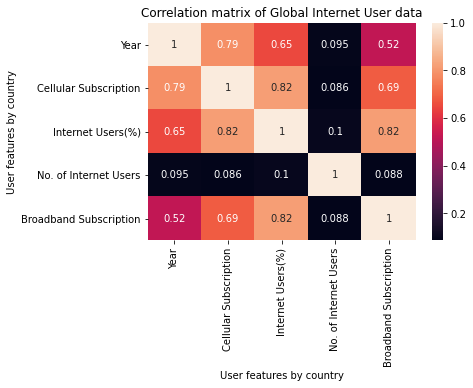

In [254]:
corr_matrix = global_users.corr()

# Use seaborn package. The strength of correlation is given vaguely by the heatmap and more eactly by the numerically. 
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix of Global Internet User data')
plt.xlabel('User features by country')
plt.ylabel('User features by country')
plt.show()

#### Comments:
- _'Year' and 'Broadband Subscription' appear to be relatively strongly correlated._
- _'Year' and 'Internet Users(%)' are more strongly coorrelated. However, 'Year' and 'No. of Internet Users' appear not to be strongly correlated. We will investgate these two relationships using a logistic regression._
- _'No. of Internet Users' does not appear to be strongy correlated with anything._
- _'Year' and 'Cellular Subscription' are highly correlated._
- _'Cellular Subscription and 'Broadband Subscription' are strongly correlated. This may be a spurious correlation but it would make some sense that as people in a country have access to one, they will also likely have access to the other._

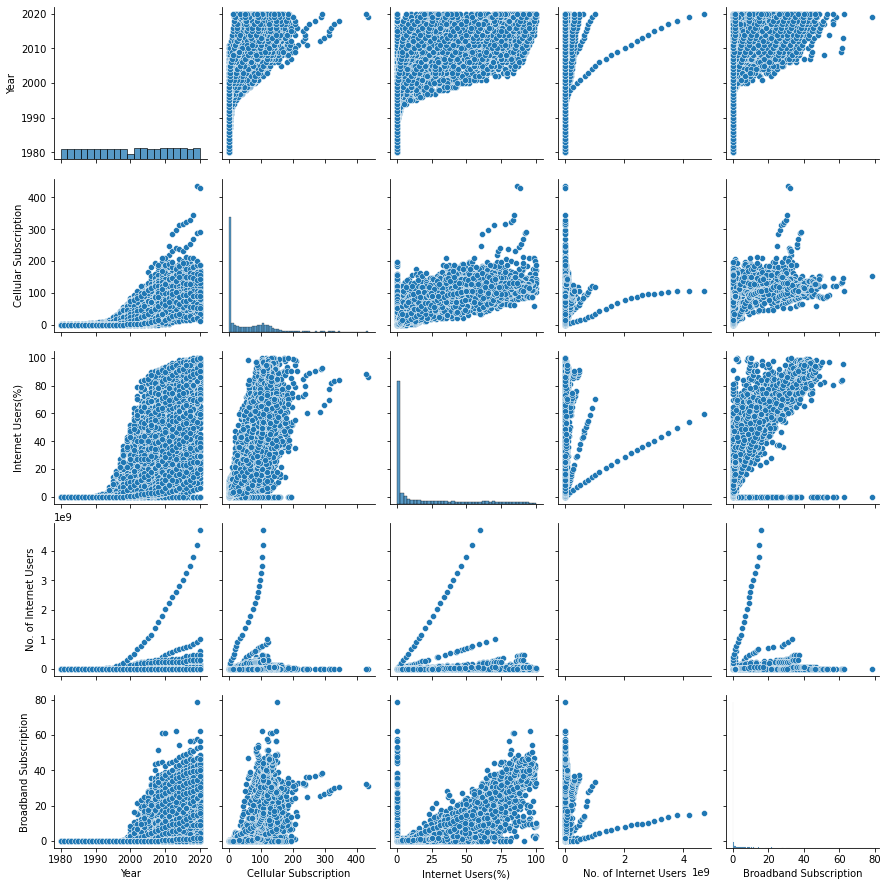

In [255]:
# Pairplot
sns.pairplot(global_users)
plt.show()

#### Comments
- _These graphs confirm that there is not a strong linear correlation between some variables_

Logistic Regressions

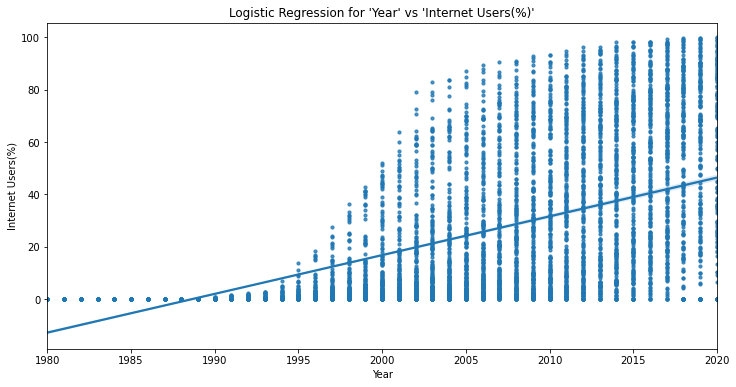

In [256]:
# Logistic Regression for 'Year' and 'Internet Users(%)'

plt.figure(figsize=(12, 6))
sns.regplot(x='Year', y='Internet Users(%)', data=global_users, scatter_kws={"s": 10})
plt.title("Logistic Regression for 'Year' vs 'Internet Users(%)'")
plt.xlabel('Year')
plt.ylabel('Internet Users(%)')
plt.show()

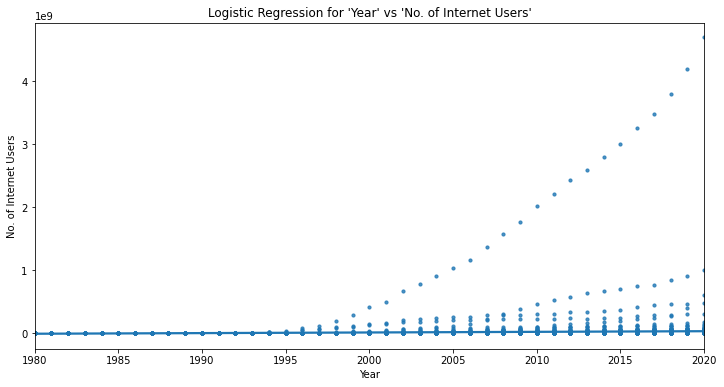

In [257]:
# Logistic Regression for 'Year' and 'Internet Users(%)'

plt.figure(figsize=(12, 6))
sns.regplot(x='Year', y='No. of Internet Users', data=global_users, scatter_kws={"s": 10})
plt.title("Logistic Regression for 'Year' vs 'No. of Internet Users'")
plt.xlabel('Year')
plt.ylabel('No. of Internet Users')
plt.show()

#### Comments
- _There are many countries that still have a very low 'No. of Internet Users' by 2020 in comparison to others, which means the value of correlation is negligible. This appears to be mostly because the population of countries is different, and we can see from the 'Internet Users(%)' logistic regression that, for ost countries, there is indeed a correlation between the year and the total number of internet users_

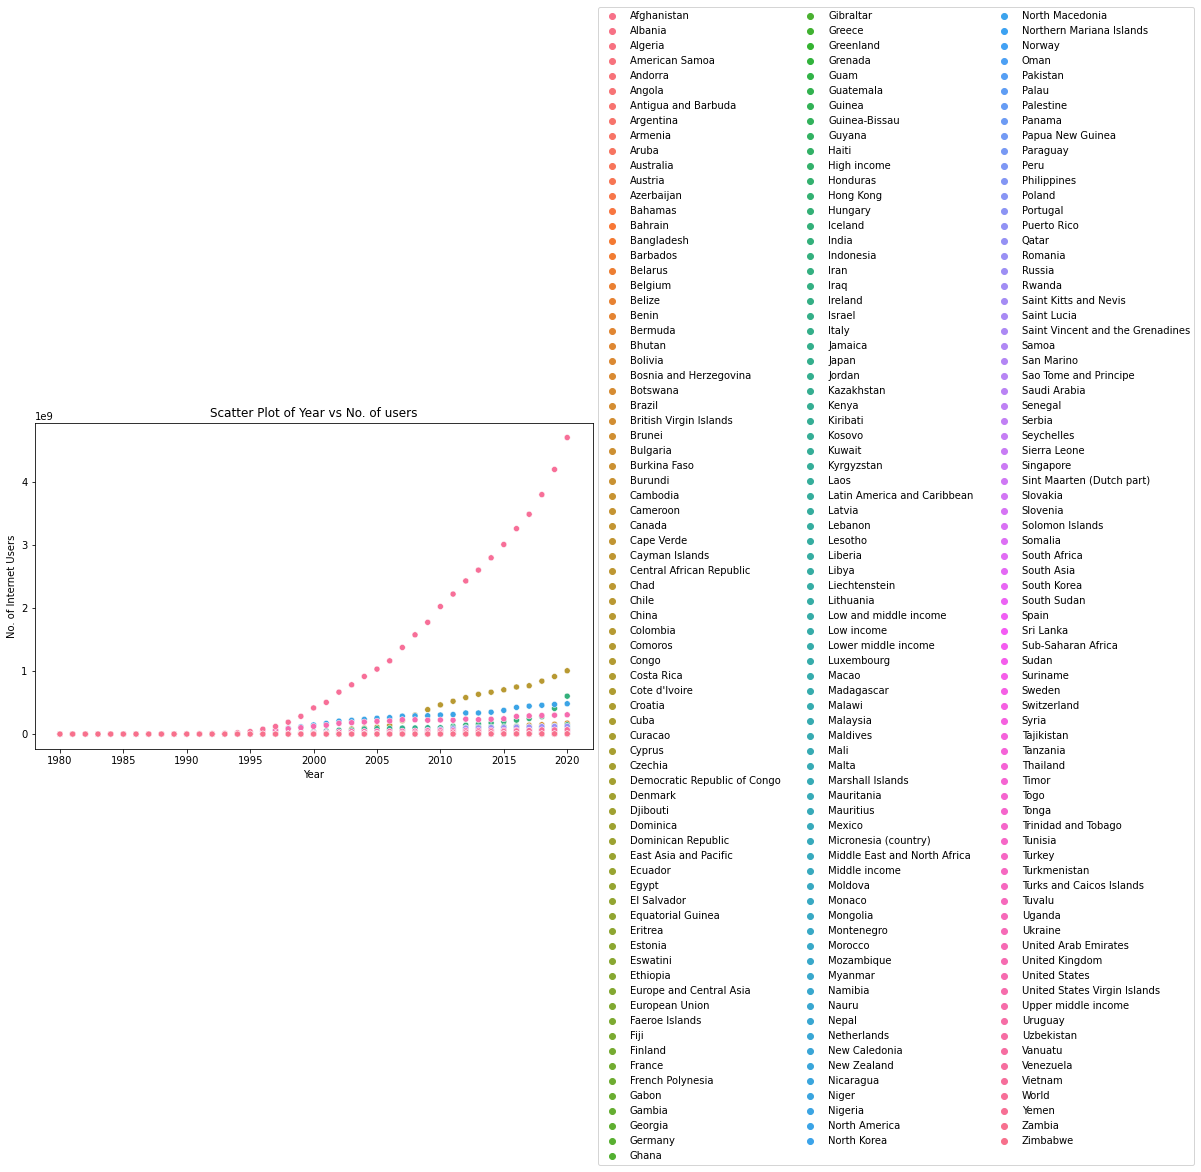

In [258]:
# Scatter Plot

plt.figure(figsize=(10,6))
sns.scatterplot(data=global_users, x='Year', y='No. of Internet Users', hue='Country')
plt.title('Scatter Plot of Year vs No. of users')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)  # Set the number of columns in the legend
plt.show()

#### Comments
- _Note that y-axis is scaled by 1e9 so, for example, there isn't 1 internet user, there's 1000000000 users_
- _The scatter plot is not a very helpful visualisation because we can't distinguish most countries data and for the couple of countries that have far more users than the rest, we can't even tell which country they are because there are too many_

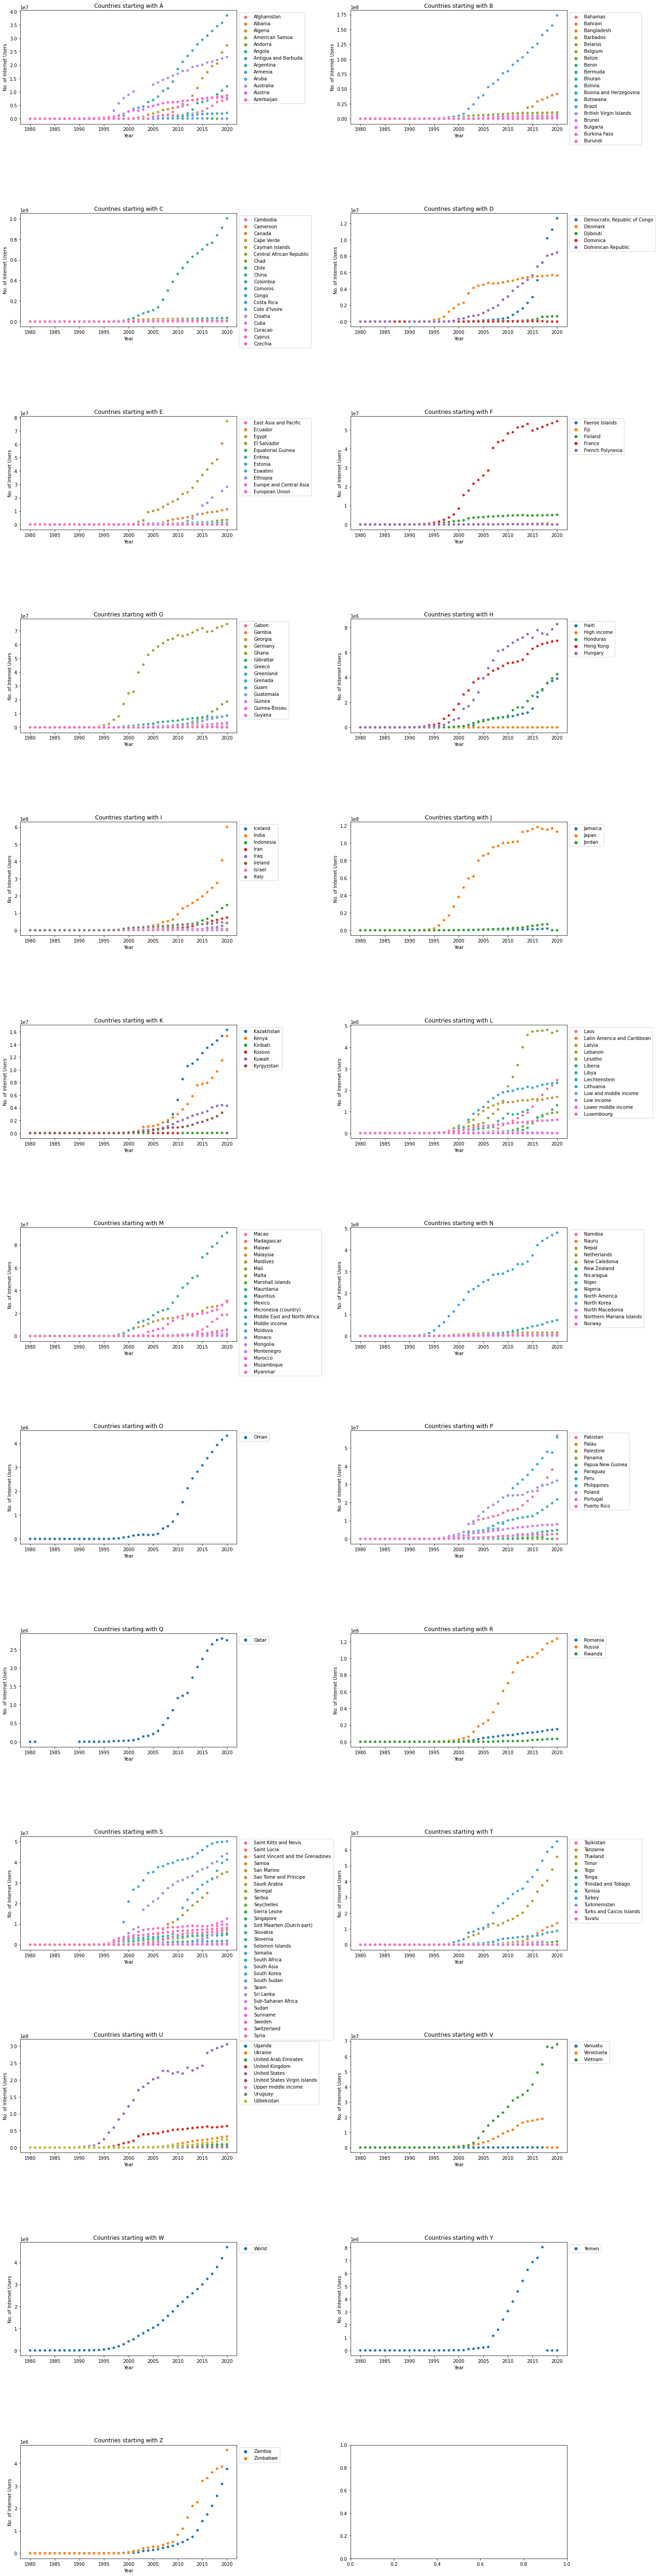

In [259]:
# Scatter Plot Subplots

# Assume that global_users is your DataFrame and it's already defined
first_letters = sorted(set(country[0] for country in global_users['Country']))

nrows = int(np.ceil(len(first_letters) / 2))
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10 * ncols, 6 * nrows))

for ax, letter in zip(axes.flatten(), first_letters):
    data = global_users[global_users['Country'].str.startswith(letter)]
    sns.scatterplot(data=data, x='Year', y='No. of Internet Users', hue='Country', ax=ax)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the position of the legend
    ax.set_title(f"Countries starting with {letter}")

plt.tight_layout()
plt.show()


#### Comments
- _We can see the data for each country more clearly now. It's still not perfect, but at least we can tell which country is which colour_
- There seems to be a general trend that from 2010 onwards, countries 'No. of Internet users'/'Internet Users(%)' increases significantly. We will investigate this slightly further using statistics and histograms.
- Again, note the scale of the y-axis on each subplot.

In [260]:
# We investigte the general statistical information about the 'Internet Users(%)' column

calculate_statistics(global_users, 'Internet Users(%)', 1980, 2020)

{'mean': 17.04360577492036,
 'median': 0.855662346,
 'std_dev': 26.881981536882478}

In [261]:
# Investigate the general stats between 2010 and 2020

calculate_statistics(global_users, 'Internet Users(%)', 2010, 2020)

{'mean': 43.97835890670916,
 'median': 42.98933792,
 'std_dev': 30.996458956588086}

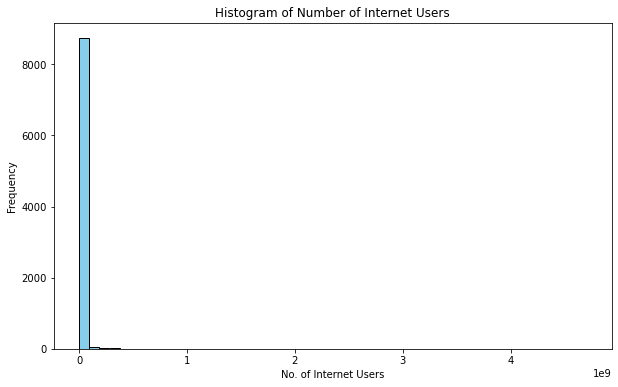

In [262]:
# Histogram showing the frequency of 'No. of Internet Users'

plt.figure(figsize=(10,6))
plt.hist(global_users['No. of Internet Users'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Internet Users')
plt.xlabel('No. of Internet Users')
plt.ylabel('Frequency')
plt.show()

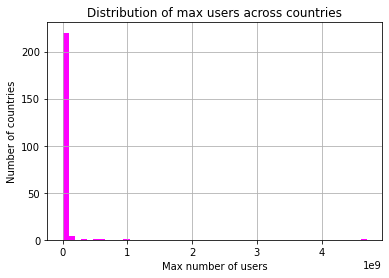

In [263]:
# Calculate the maximum number of users for each country
max_users = global_users.groupby('Country')['No. of Internet Users'].max()

# Histogram to show the frequency of max value in 'No. of Internet Users' column

max_users.hist(bins=50, color='magenta')
plt.xlabel('Max number of users')
plt.ylabel('Number of countries')
plt.title('Distribution of max users across countries')
plt.show()

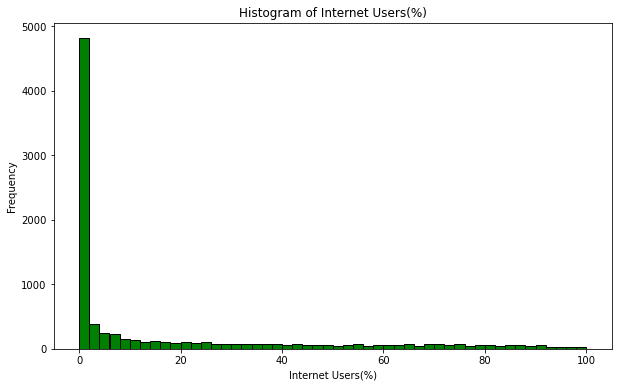

In [264]:
# Histogram of frquency of values in 'Internet Users(%)' column instead of 'No. of Internet Users'

plt.figure(figsize=(10,6))
plt.hist(global_users['Internet Users(%)'].dropna(), bins=50, color='green', edgecolor='black')
plt.title('Histogram of Internet Users(%)')
plt.xlabel('Internet Users(%)')
plt.ylabel('Frequency')
plt.show()

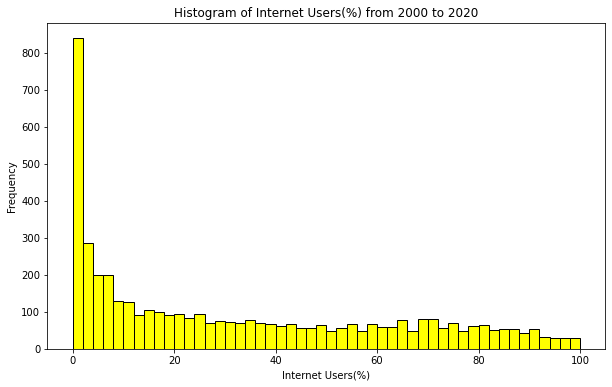

In [265]:
# Histogram of 'Internet Users(%)' from years 2000 to 2020

# Filter the DataFrame to include only the years 2000 to 2020
global_users_2000_2020 = global_users[(global_users['Year'] >= 2000) & (global_users['Year'] <= 2020)]

# Plot a histogram of 'Internet Users(%)'
plt.figure(figsize=(10,6))
plt.hist(global_users_2000_2020['Internet Users(%)'], bins=50, color='yellow', edgecolor='black')
plt.title('Histogram of Internet Users(%) from 2000 to 2020')
plt.xlabel('Internet Users(%)')
plt.ylabel('Frequency')
plt.show()


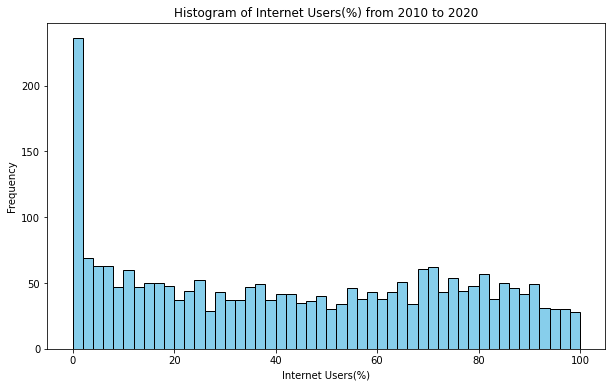

In [266]:
# Histogram of 'Internet Users(%)' from years 2010 to 2020

# Filter the data for years 2010 to 2020
filtered_data = global_users[(global_users['Year'] >= 2010) & (global_users['Year'] <= 2020)]

plt.figure(figsize=(10,6))
plt.hist(filtered_data['Internet Users(%)'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Internet Users(%) from 2010 to 2020')
plt.xlabel('Internet Users(%)')
plt.ylabel('Frequency')
plt.show()

#### Comments
- _A huge amount of values in the 'No. of Internet Users' column are nearer zero_
- _The histograms and general stats confirm our observations that internet users increase significantly from 2000 onwards. The frequency of higher percentages increases and the frequency of values close to zero decreases. Hence, the histogram becomes less skewed._

### Machine Learning

We will apply a supervised learning algorithm to the data. We apply the linear regression model with the target variable 'Internet Users(%)' and evaluate the models performance.  Our target variable is continuous and so we must select the type of model we use carefully. 

In [267]:
merged_users.dtypes

Country                     object
Code                        object
Year                        object
Cellular Subscription      float64
Internet Users(%)          float64
No. of Internet Users_x      int64
Broadband Subscription     float64
Region                      object
Population                   int64
No. of Internet Users_y      int64
% of Population            float64
dtype: object

In [268]:
# Convert 'Year' column to integer type
merged_users['Year'] = merged_users['Year'].astype(int)

In [269]:
# Filter the merged dataset to include only the years 2010 to 2020
filtered_data = merged_users[(merged_users['Year'] >= 2010) & (merged_users['Year'] <= 2020)]

# Prepare the input features
input_features = filtered_data[['Year']]
target_variable = filtered_data['Internet Users(%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_features, target_variable, test_size=0.8, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 939.4047591389018
Root Mean Squared Error (RMSE): 30.649710588175246
Mean Absolute Error (MAE): 26.737526702501597
R-squared Score: 0.020847869483188397


#### Comments
- _The MSE, RMSE and MAE seem quite high._
- _The R-squared score is closer to zero than one, meaning it's not a very good predictor._
- _I think this is somewhat explainable by the fact that the relationships between the variables do not appear to be very linear, both from the heatmap and the pairplot we produced earlier._ 
- _Below, we will apply a different model and compare it's performance._

#### LinearRegression Model

In [270]:
# Prepare the Data
input_features = merged_users[['Year', 'Cellular Subscription', 'Broadband Subscription']]
target_variable = merged_users['Internet Users(%)']

# Split the Data, setting the test size at 80%
X_train, X_test, y_train, y_test = train_test_split(input_features, target_variable, test_size=0.8, random_state=42)

# Step 3: Train the Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 155.4996051880436
Root Mean Squared Error (RMSE): 12.469948082812678
Mean Absolute Error (MAE): 6.157602087949069
R-squared Score: 0.790553447837242


#### Comments:
- _The R-squared score is much imporved and massively closer to 1, meaning this model is a much better predictor of the target variable._
- We will try a random forest model and compare.

#### RandomForestRegressor Model

In [271]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_features, target_variable, test_size=0.8, random_state=42)

# Create and train the Random Forest regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 128.37449469155763
Mean Absolute Error: 5.096478142605227
R-squared Score: 0.82708898028218


#### Comments:
- _The R_squared score is the highest of the models. The MSE and RMSE are the lowest._
- _This shows that the RandomForestRegressor model is the most accurate at predicting the 'Internet Users(%)_

Now, we perform hyperparameter tuning on the RandomForestRegressor model using the RandomisedSearch cross validation function

#### Hyperparameter Tuning

In [272]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 7, 12],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 8],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

# Create a random forest regressor
rf = RandomForestRegressor()

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 7}
Root Mean Squared Error: 11.100446987364469
Mean Absolute Error: 5.0021545471728865
R-squared: 0.8340318094970387


#### Comments: 
- _The R-squared metric is slightly higher than the RandomForestRegressor previously._
- _Errors are lower._
- _83% accurate means the model is a pretty good predictor of 'Internet Users(%)_ 